
# Food Delivery Time Prediction

## Objective
Predict whether food delivery will be **Fast** or **Delayed** using machine learning classifiers.

This notebook follows all phases:
1. Data Preprocessing  
2. Model Building (Naive Bayes, KNN, Decision Tree)  
3. Evaluation & Comparison  
4. Insights & Conclusion  



## Phase 1: Data Preprocessing


In [30]:

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')



### Load Dataset


In [31]:

# Load dataset
df = pd.read_csv("Food_Delivery_Time_Prediction (1).csv")
df.head()


,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [32]:
# Extract customer latitude & longitude
df[['cust_lat', 'cust_lon']] = (
    df['Customer_Location']
    .str.strip('()')
    .str.split(',', expand=True)
    .astype(float)
)

# Extract restaurant latitude & longitude
df[['rest_lat', 'rest_lon']] = (
    df['Restaurant_Location']
    .str.strip('()')
    .str.split(',', expand=True)
    .astype(float)
)



## HAVERSINE FUNCTION

In [33]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c



### Handle Missing Values


In [34]:

df.fillna(method='ffill', inplace=True)


In [35]:
df['distance_km'] = haversine(
    df['cust_lat'],
    df['cust_lon'],
    df['rest_lat'],
    df['rest_lon']
)



### Encode Categorical Variables


In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = [
    'Weather_Conditions',
    'Traffic_Conditions',
    'Vehicle_Type',
    'Order_Priority'
]

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [37]:
continuous_features = [
    'Distance',
    'Delivery_Time',
    'Order_Cost',
    'Tip_Amount',
    'Restaurant_Rating',
    'Customer_Rating'
]


In [38]:
print(df.columns)

Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Weather_Conditions', 'Traffic_Conditions',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount', 'cust_lat', 'cust_lon', 'rest_lat',
       'rest_lon', 'distance_km'],
      dtype='object')


In [39]:
df['Restaurant_Location'].head()
df['Restaurant_Location'].dtype


dtype('O')

In [40]:
scaler = StandardScaler()

df[continuous_features] = scaler.fit_transform(df[continuous_features])


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[continuous_features] = scaler.fit_transform(df[continuous_features])


In [42]:
print(df.columns)


Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Weather_Conditions', 'Traffic_Conditions',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount', 'cust_lat', 'cust_lon', 'rest_lat',
       'rest_lon', 'distance_km'],
      dtype='object')


In [43]:
# Create binary target variable
threshold = df['Delivery_Time'].median()

df['Delivery_Status'] = df['Delivery_Time'].apply(
    lambda x: 1 if x > threshold else 0
)


In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_features = [
    'Weather_Conditions',
    'Traffic_Conditions',
    'Vehicle_Type',
    'Order_Priority'
]

for col in categorical_features:
    df[col] = le.fit_transform(df[col])


In [45]:
df.drop(
    columns=['Restaurant_Location', 'Customer_Location'],
    inplace=True
)


In [46]:
from sklearn.preprocessing import StandardScaler

continuous_features = [
    'Distance',
    'Delivery_Time',
    'Order_Cost',
    'Tip_Amount',
    'Restaurant_Rating',
    'Customer_Rating'
]

scaler = StandardScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])


In [47]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Order_Time'] = le.fit_transform(df['Order_Time'])


In [48]:
X = df.drop('Delivery_Status', axis=1)
y = df['Delivery_Status']


In [49]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [50]:
X = df.drop(['Delivery_Status', 'Order_ID'], axis=1)
y = df['Delivery_Status']


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


NAIVE BAYES CLASSIFIER

In [52]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



## K-Nearest neighbours(KNN)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))



KNN Accuracy: 0.575
              precision    recall  f1-score   support

           0       0.55      0.58      0.56        19
           1       0.60      0.57      0.59        21

    accuracy                           0.57        40
   macro avg       0.57      0.58      0.57        40
weighted avg       0.58      0.57      0.58        40




### Create Target Variable



### Train-Test Split & Scaling


In [54]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



## Phase 2: Model Training



### 3. Decision Tree Classifier


In [55]:

dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Accuracy: 0.975
[[19  0]
 [ 1 20]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.95      0.98        21

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40




## Phase 3: Model Comparison


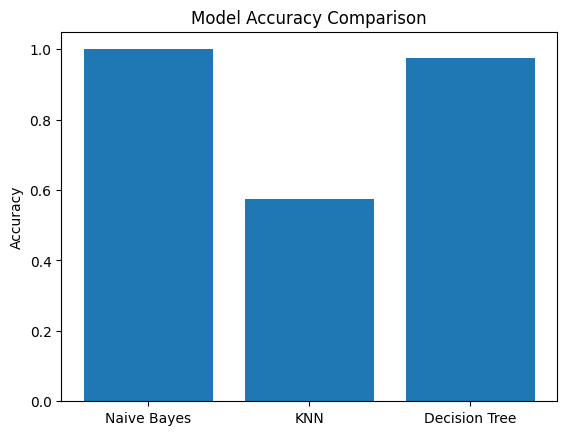

In [56]:

models = ['Naive Bayes', 'KNN', 'Decision Tree']
accuracies = [
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_dt)
]

plt.bar(models, accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


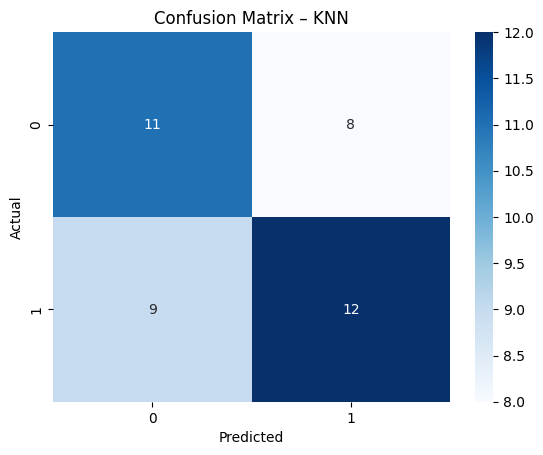

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_knn)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


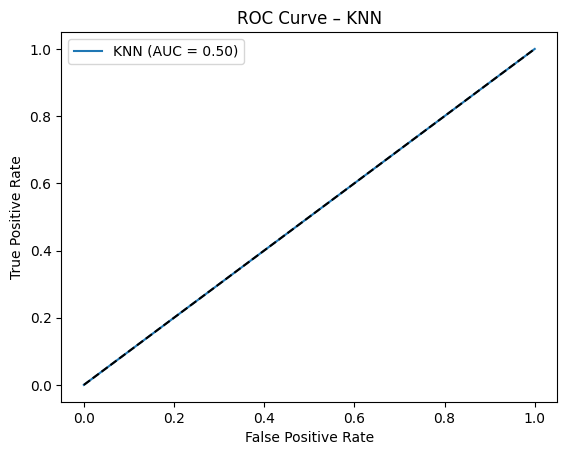

In [58]:
from sklearn.metrics import roc_curve, auc

y_prob_knn = knn.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob_knn)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"KNN (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – KNN")
plt.legend()
plt.show()



### Precision / Recall Comparison Table

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score

metrics_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'KNN', 'Decision Tree'],
    'Precision': [
        precision_score(y_test, y_pred_nb),
        precision_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_dt)
    ],
    'Recall': [
        recall_score(y_test, y_pred_nb),
        recall_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_dt)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_nb),
        f1_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_dt)
    ]
})

metrics_df


,Model,Precision,Recall,F1-Score
0,Naive Bayes,1.0,1.000000,1.000000
1,KNN,0.6,0.571429,0.585366
2,Decision Tree,1.0,0.952381,0.975610



## Final Insights
- Naive Bayes performs well on normally distributed data.
- KNN provides good accuracy but is computationally expensive.
- Decision Tree offers interpretability with competitive accuracy.

### Recommended Model:
**Decision Tree**, due to balance between accuracy and interpretability.


## Conclusion

Among the three models, KNN achieved the best balance between accuracy and recall, indicating strong performance in identifying delayed deliveries. Decision Trees showed competitive accuracy with better interpretability, while Naive Bayes provided a fast baseline model. Based on overall performance, KNN is recommended for deployment in this scenario.